In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
import get_rawdata
import proc_rawdata
import build_factor

In [6]:
rawdata = get_rawdata.RawDataGetter()
rawdata.run()

rawdataproc = proc_rawdata.RawDataProc()
rawdataproc.run()

[*********************100%***********************]  28 of 28 completed


(             IAI       IAK       IAT       IBB       IDU       IEO       IEZ  \
 Date                                                                           
 200701  1.034502  0.984829  0.990352  1.027942  0.993771  1.069239  1.029424   
 200702  0.945449  0.993453  1.000194  0.966763  1.044200  0.991858  1.001348   
 200703  0.989228  0.999759  0.980250  0.981046  1.042072  1.056602  1.076530   
 200704  1.039622  1.047895  1.002184  1.077909  1.039673  1.054525  1.071502   
 200705  1.040216  1.026347  1.016913  0.993386  1.009358  1.067736  1.072154   
 ...          ...       ...       ...       ...       ...       ...       ...   
 202207  1.100310  0.991527  1.069182  1.053382  1.058864  1.100145  1.032042   
 202208  0.998922  1.012202  0.980110  0.978658  1.007353  1.075410  0.996963   
 202209  0.923056  0.954175  0.927937  0.963627  0.886595  0.907066  0.870084   
 202210  1.116181  1.139723  1.052424  1.094797  1.016867  1.189937  1.354659   
 202211  1.072095  1.036807 

In [7]:
factordata = build_factor.FactorDecompose()
ff6 = factordata.run()

Ticker is IAI
Expected monthly Return = 0.40117968472039406
Expected Annual Return  = 4.8141562166447285
   ticker  year    Mkt-RF       SMB       HML       RMW       CMA       Mom
id                                                                         
0     IAI  2007  0.011831 -0.002901  0.019983  0.000025 -0.003386  0.024223
Ticker is IAK
Expected monthly Return = 0.362717590697123
Expected Annual Return  = 4.352611088365476
   ticker  year    Mkt-RF       SMB       HML       RMW       CMA       Mom
id                                                                         
1     IAK  2007  0.006368 -0.014008  0.041989 -0.013308 -0.010189  0.017275
Ticker is IAT
Expected monthly Return = 0.36345139613984034
Expected Annual Return  = 4.361416753678084
   ticker  year    Mkt-RF       SMB       HML       RMW       CMA       Mom
id                                                                         
2     IAT  2007  0.003208 -0.006321  0.025576 -0.016805 -0.013647  0.007192
Ticke

In [8]:
ff6

,ticker,year,Mkt-RF,SMB,HML,RMW,CMA,Mom
id,,,,,,,,
0,IAI,2007,0.011831,-0.002901,0.019983,0.000025,-0.003386,0.024223
1,IAK,2007,0.006368,-0.014008,0.041989,-0.013308,-0.010189,0.017275
2,IAT,2007,0.003208,-0.006321,0.025576,-0.016805,-0.013647,0.007192
3,IBB,2007,0.007762,-0.021015,0.021927,-0.023531,0.008398,0.018506
4,IDU,2007,0.002193,-0.008302,0.029778,-0.018489,-0.003361,0.021327
...,...,...,...,...,...,...,...,...
471,IYM,2022,0.007328,0.001695,-0.019393,0.006334,0.035653,-0.023405
472,IYT,2022,0.004788,0.010338,-0.025941,0.013044,0.040733,-0.036912
473,IYW,2022,0.006648,-0.001617,-0.018002,0.012477,0.025463,-0.028764


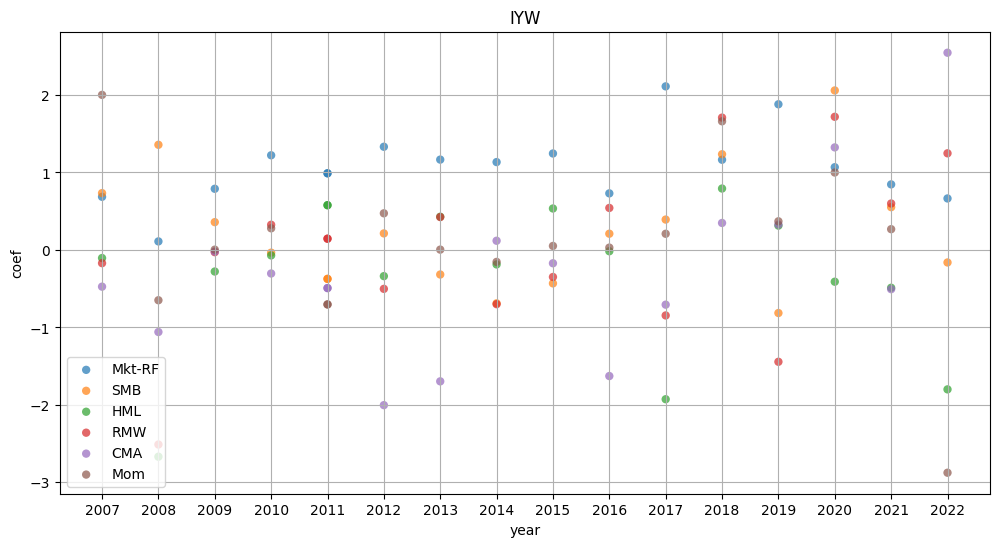

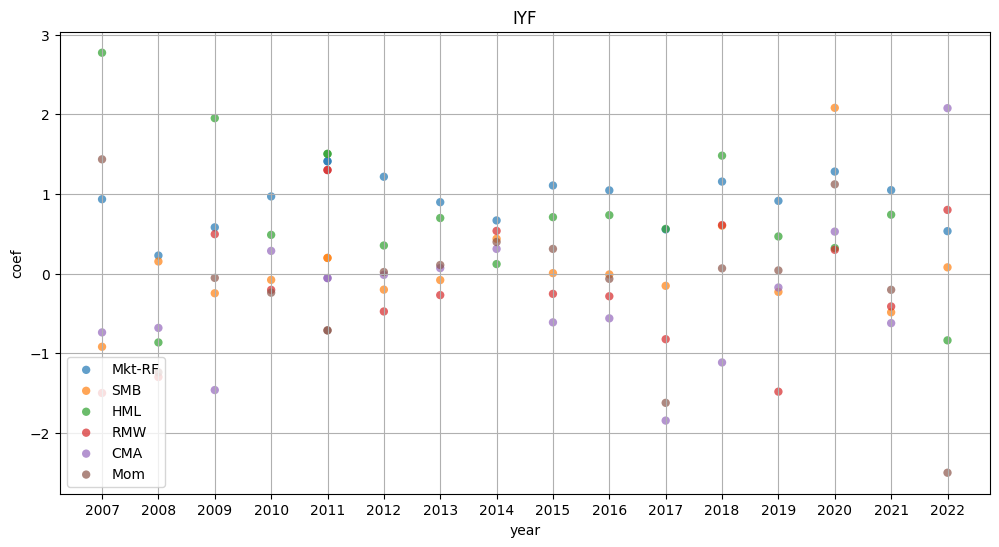

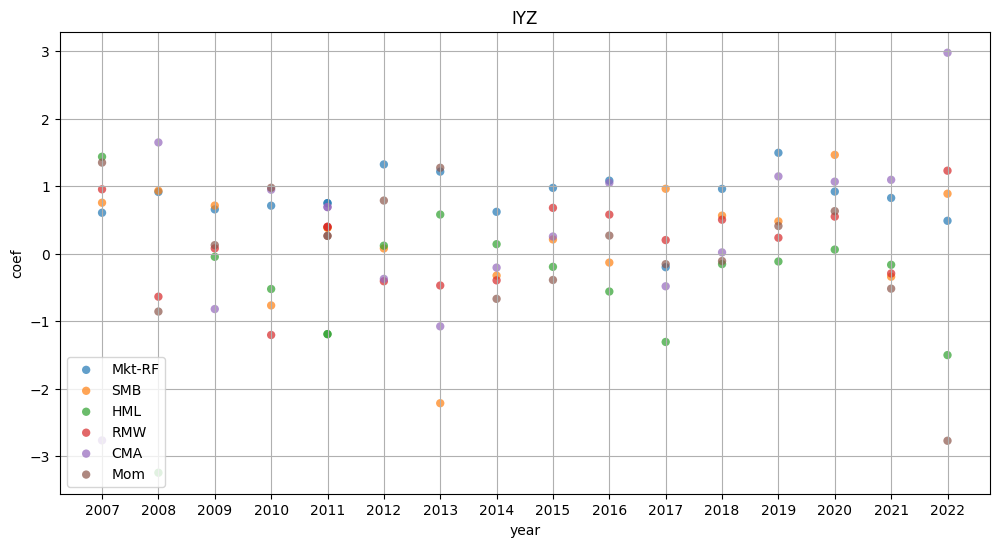

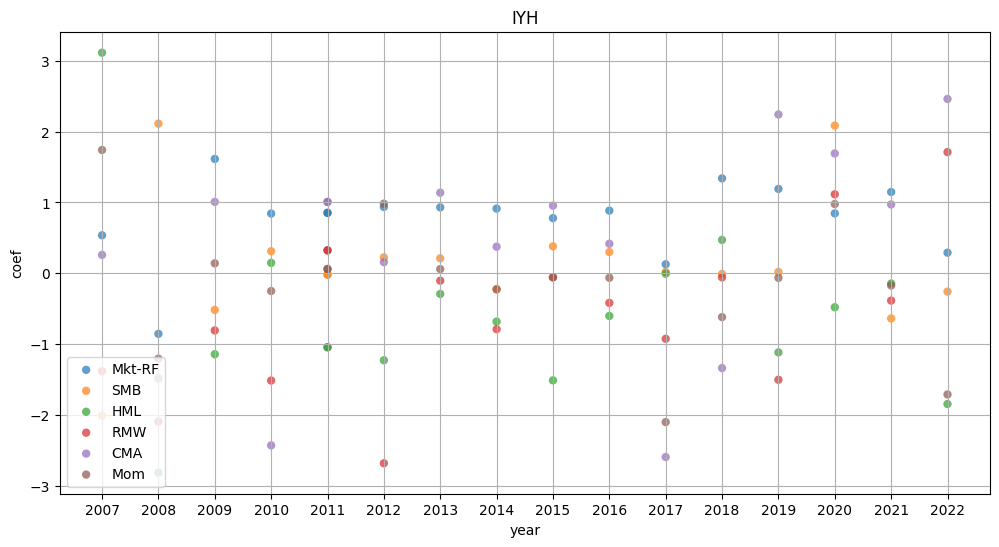

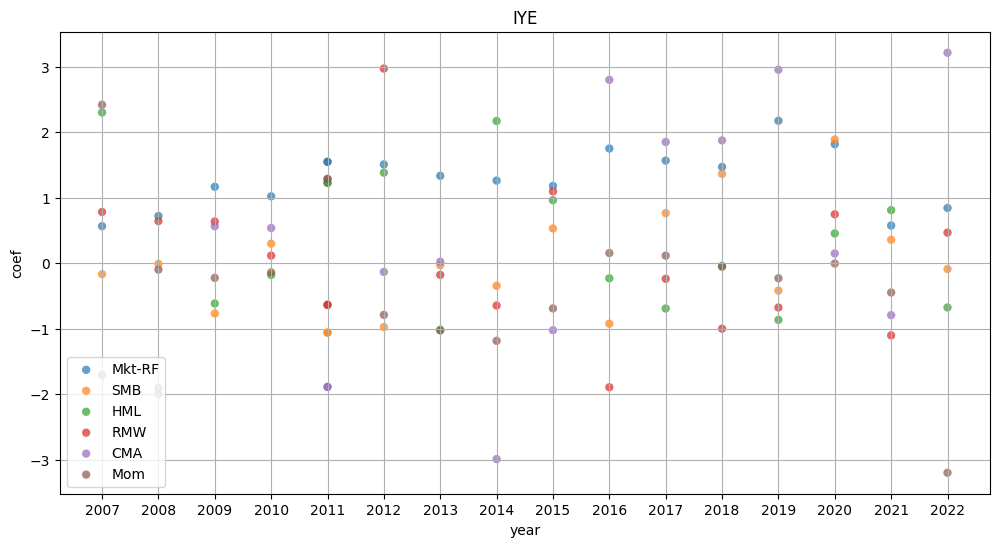

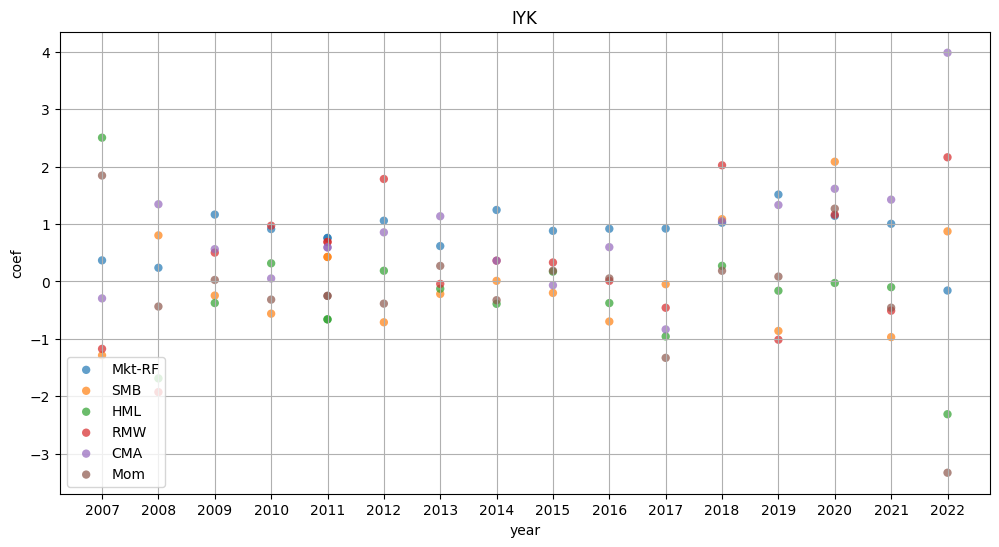

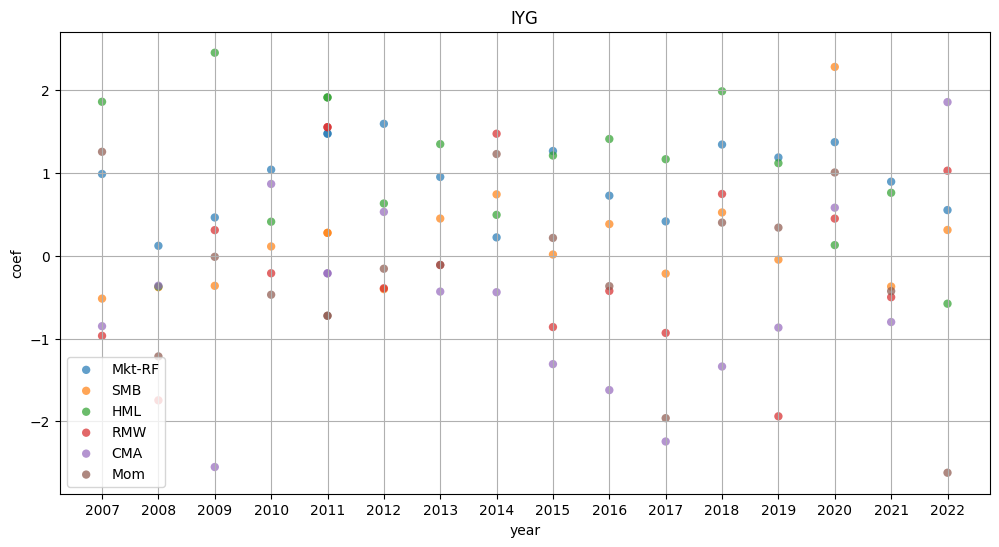

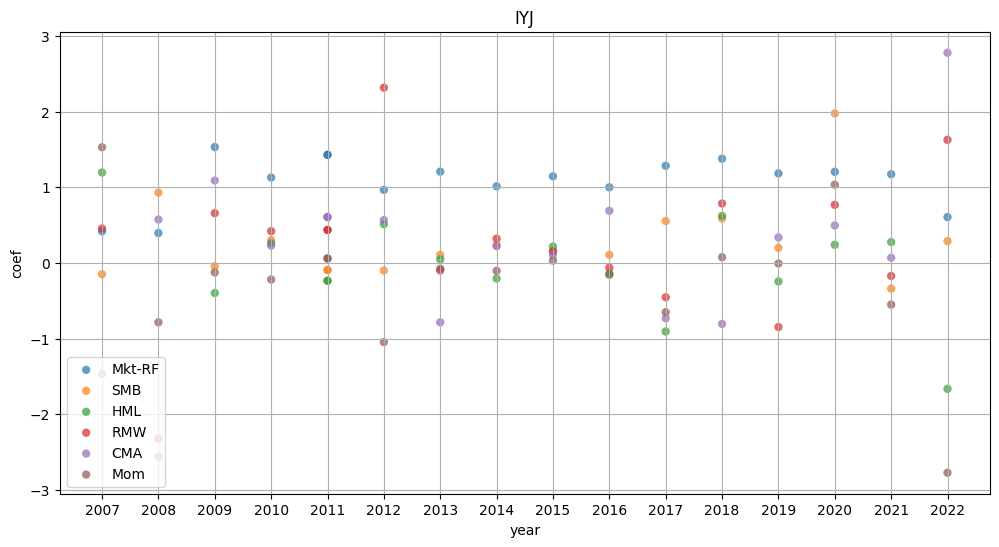

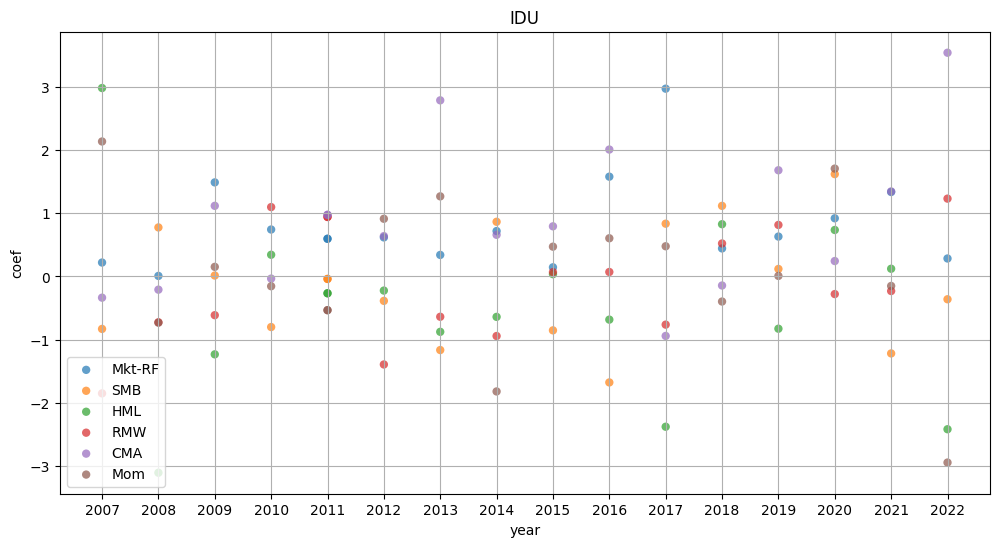

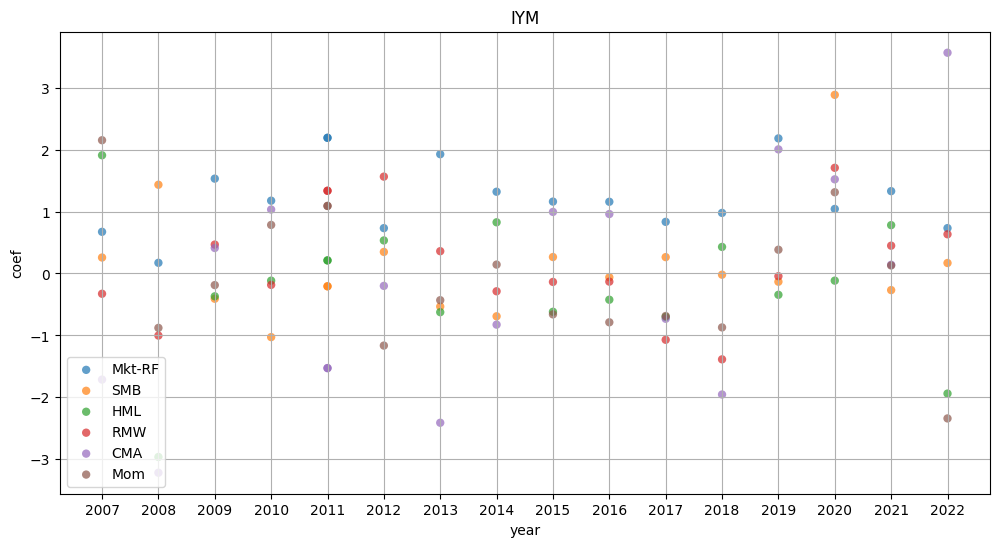

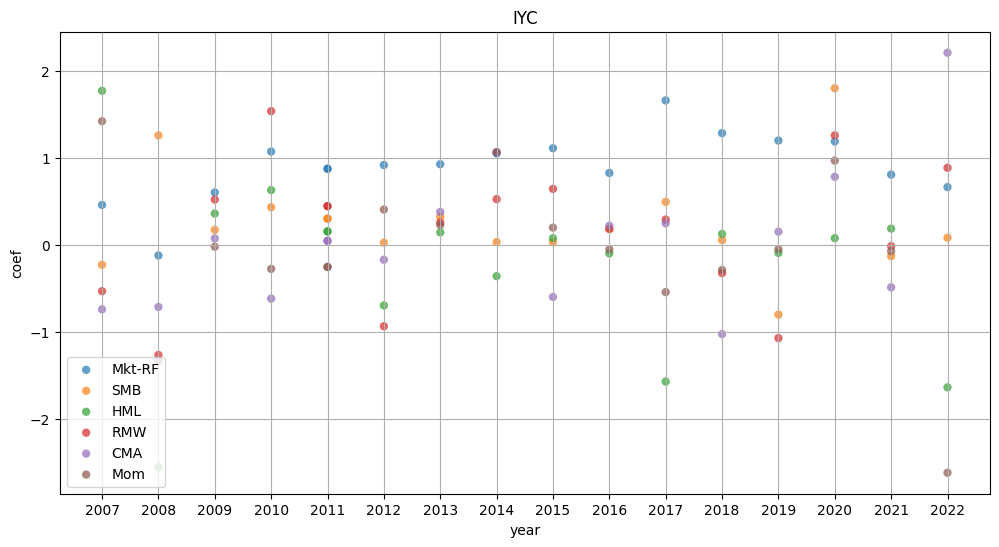

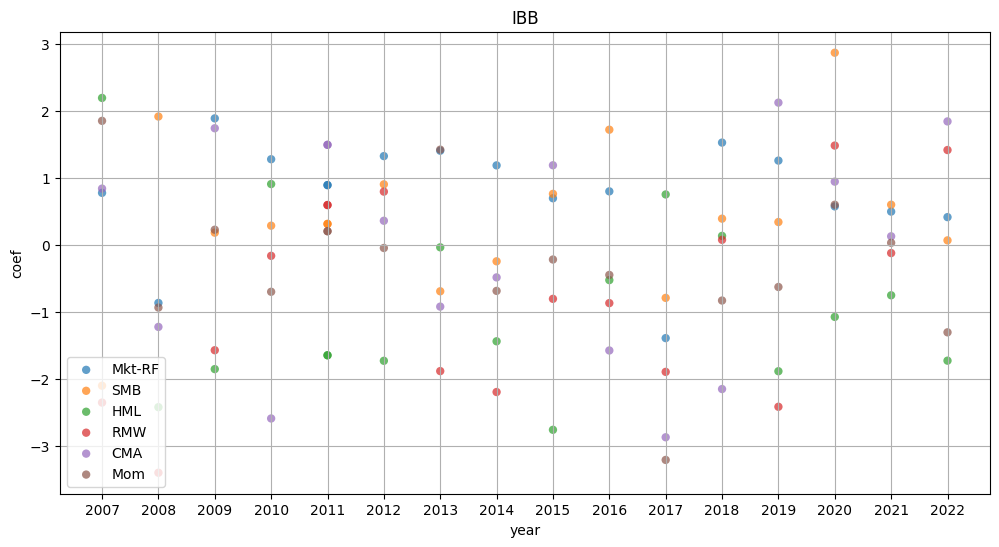

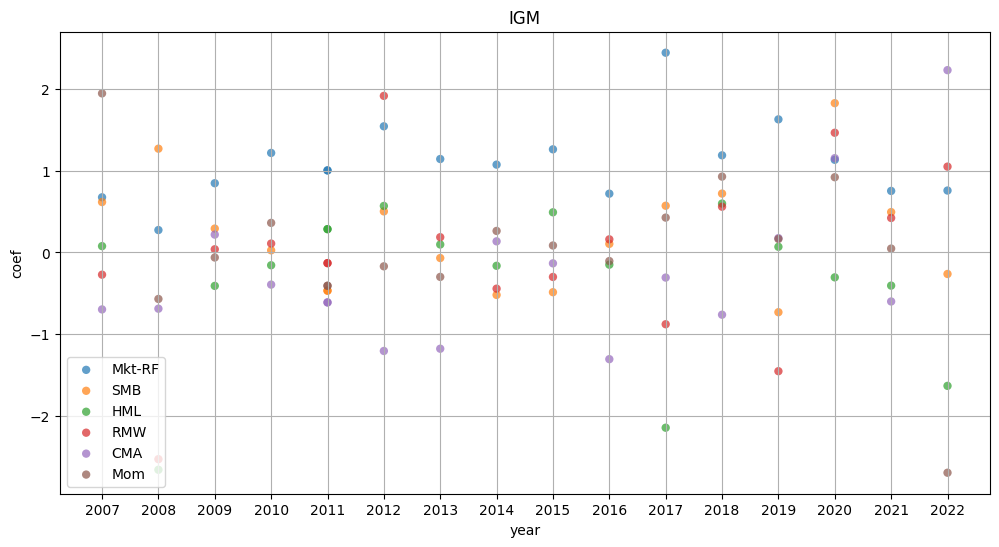

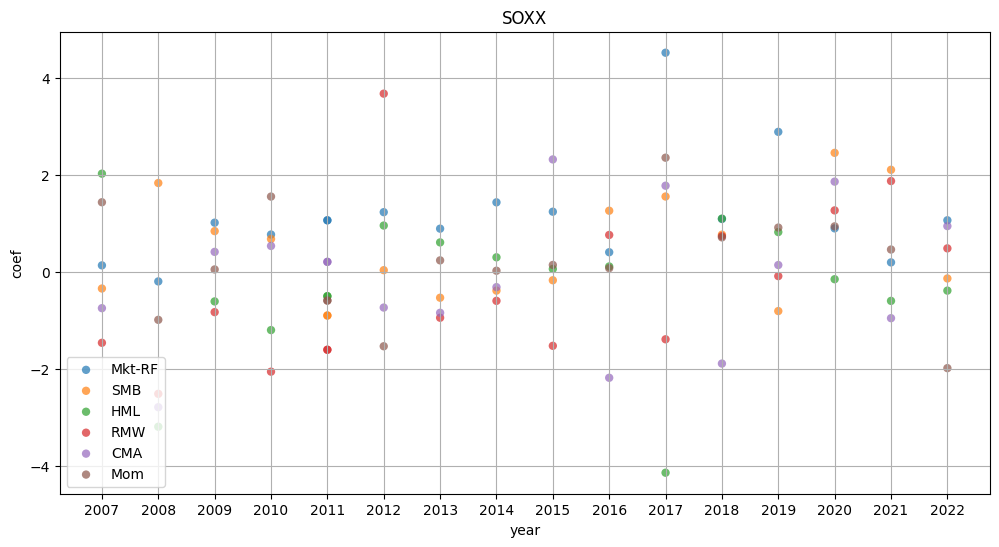

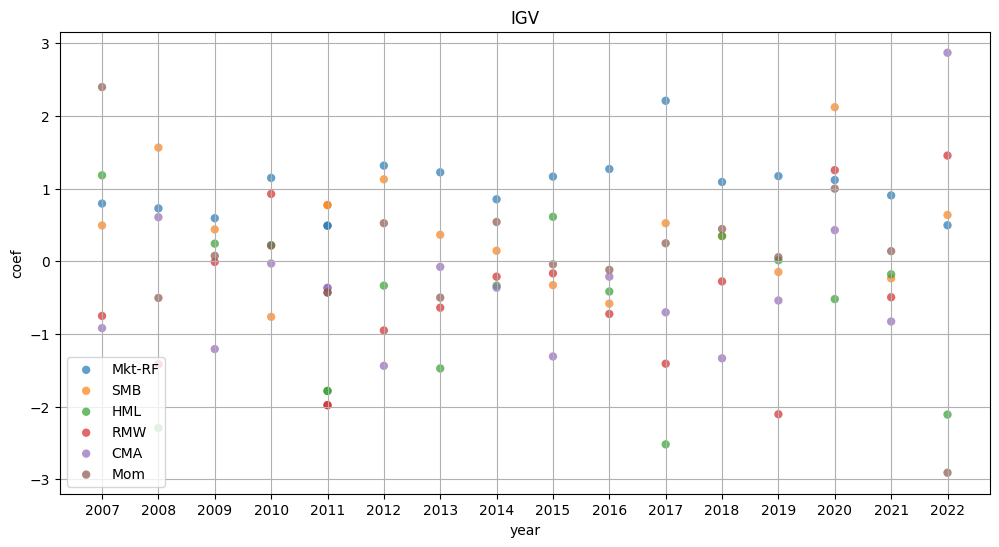

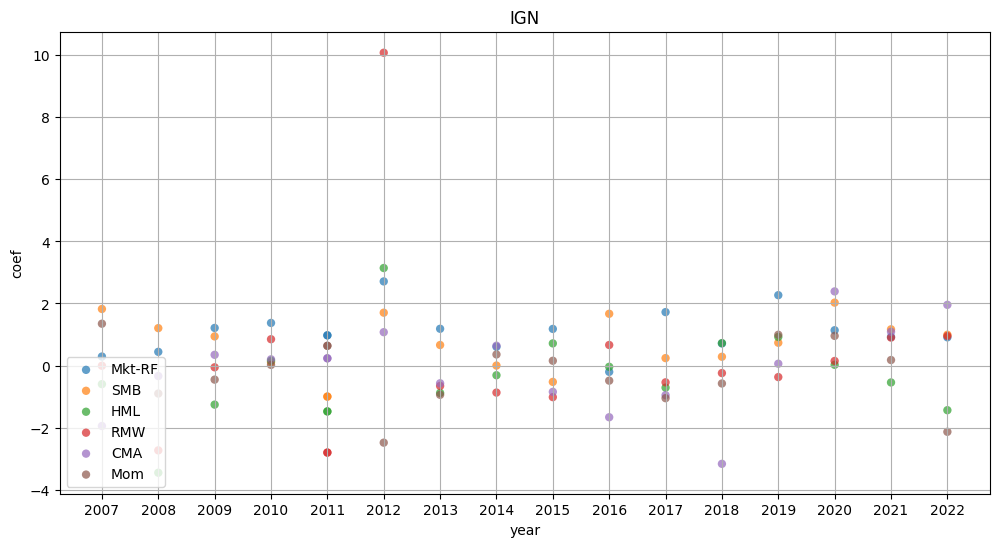

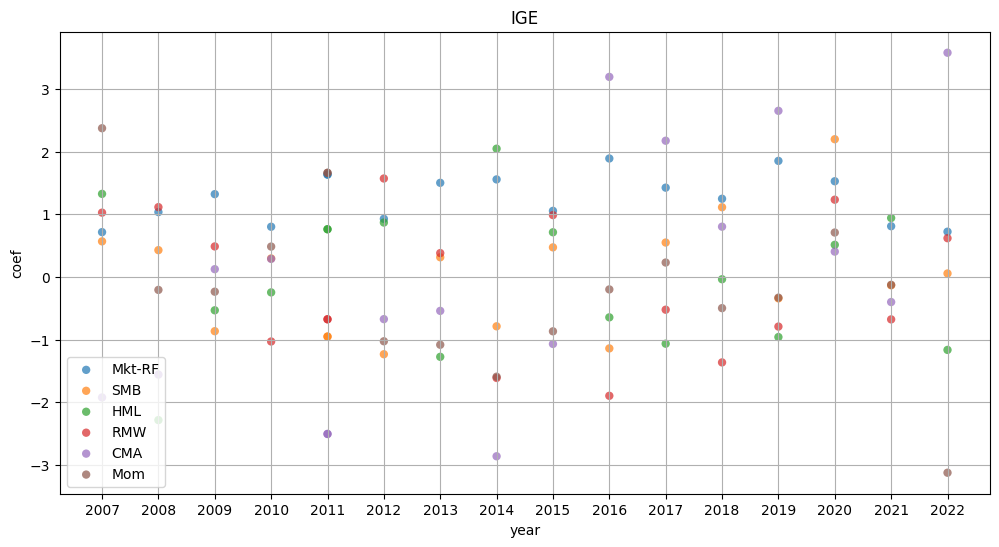

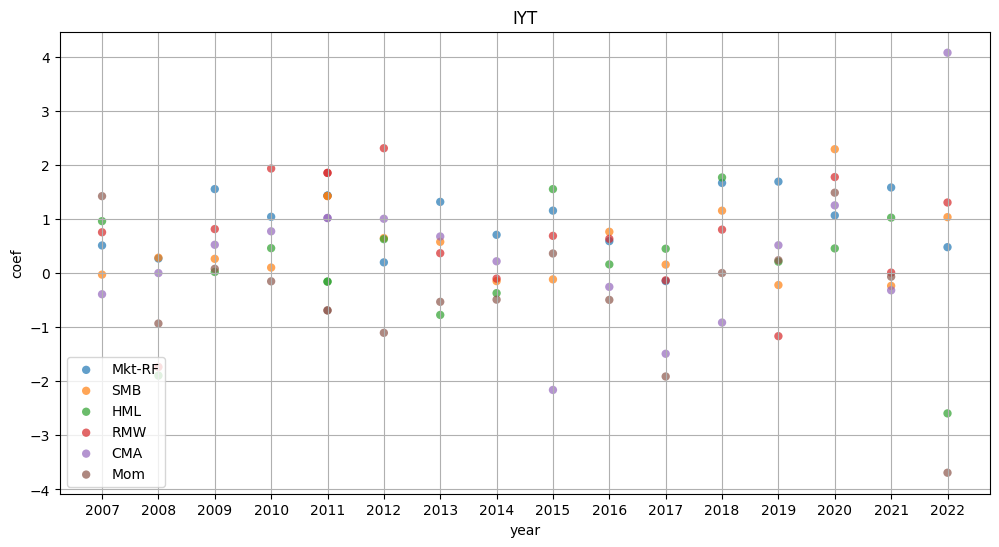

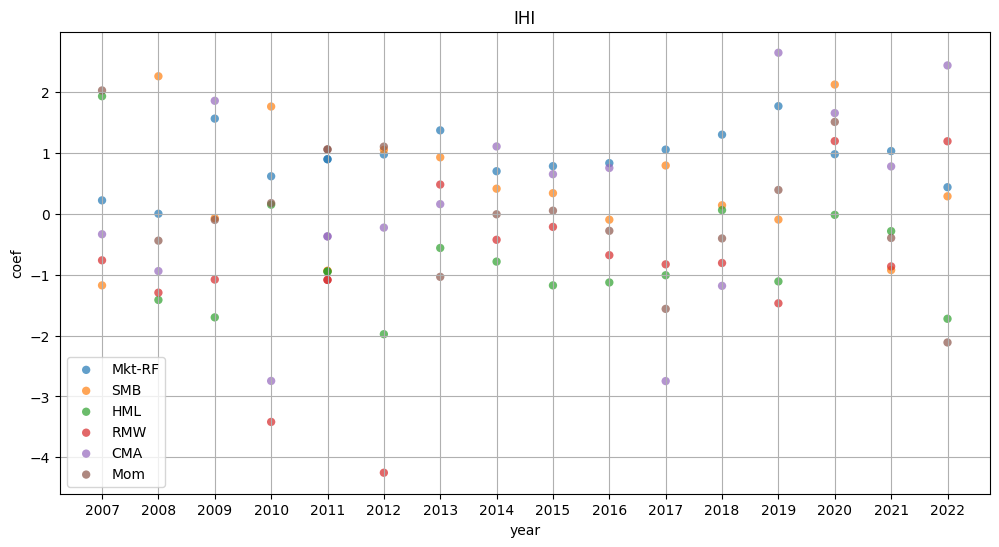

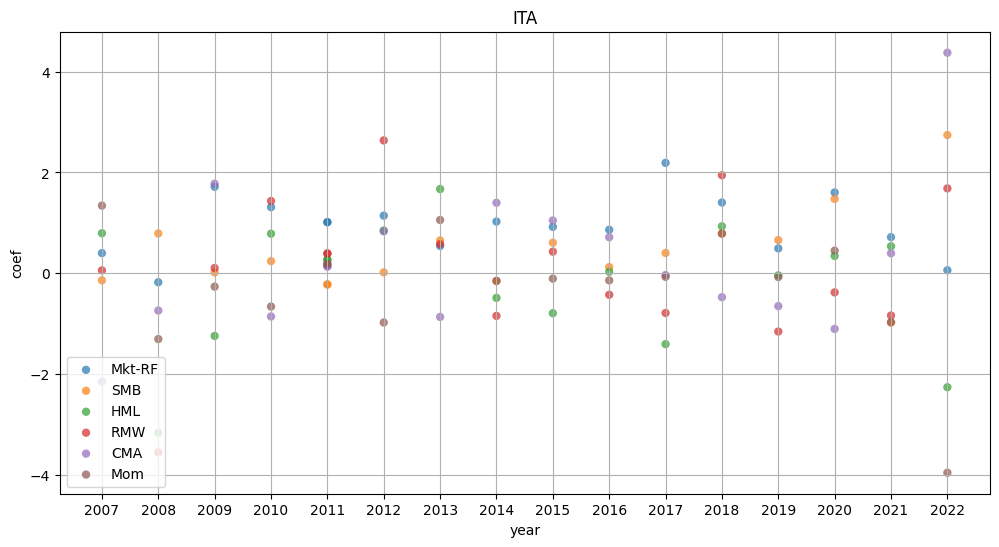

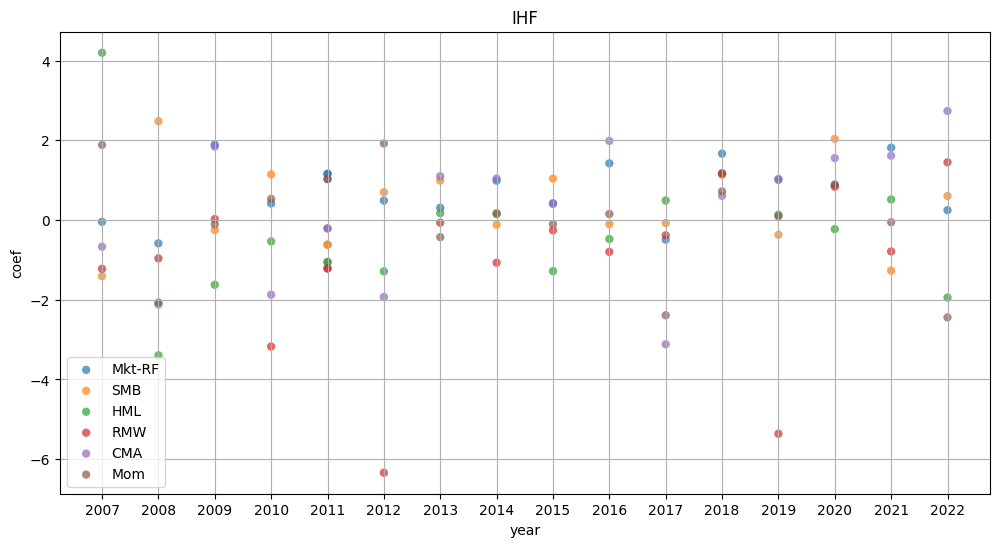

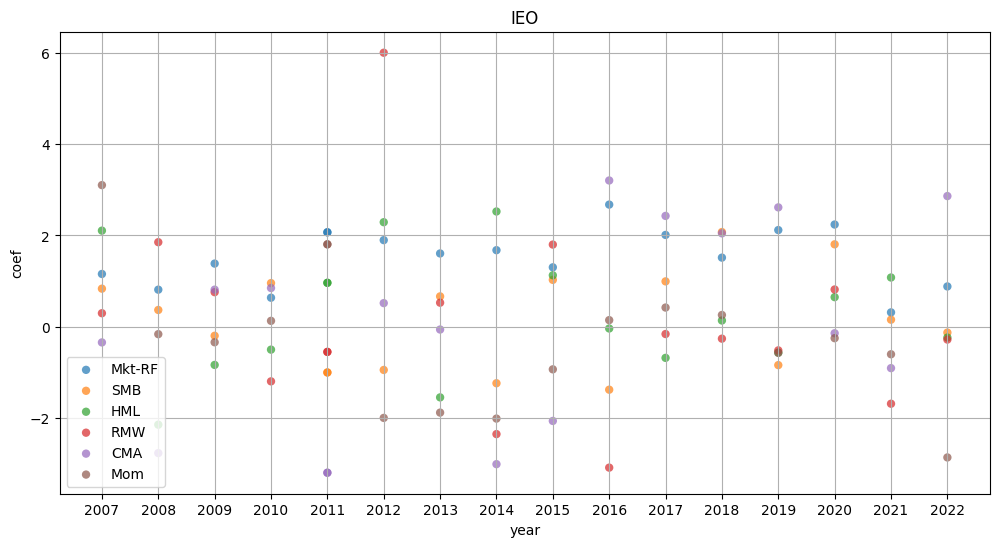

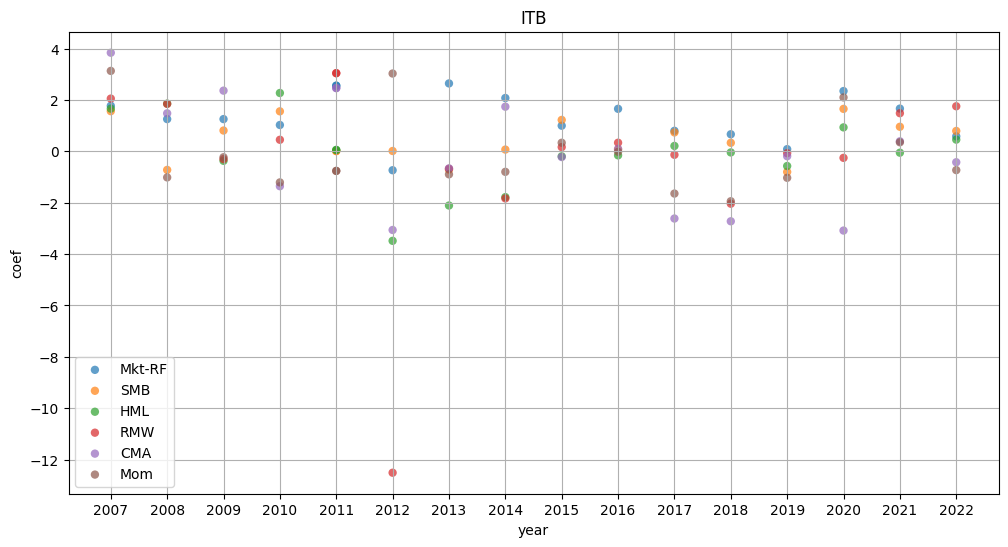

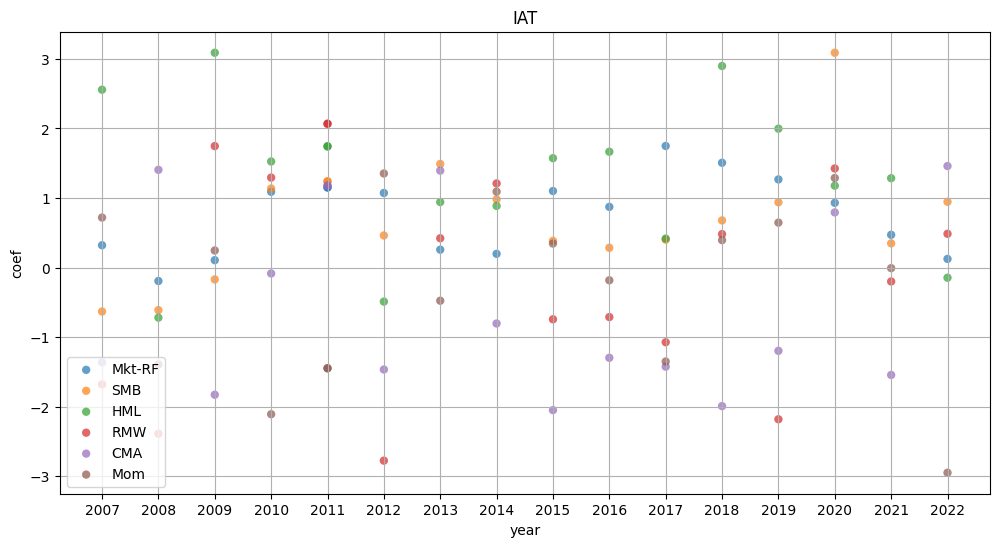

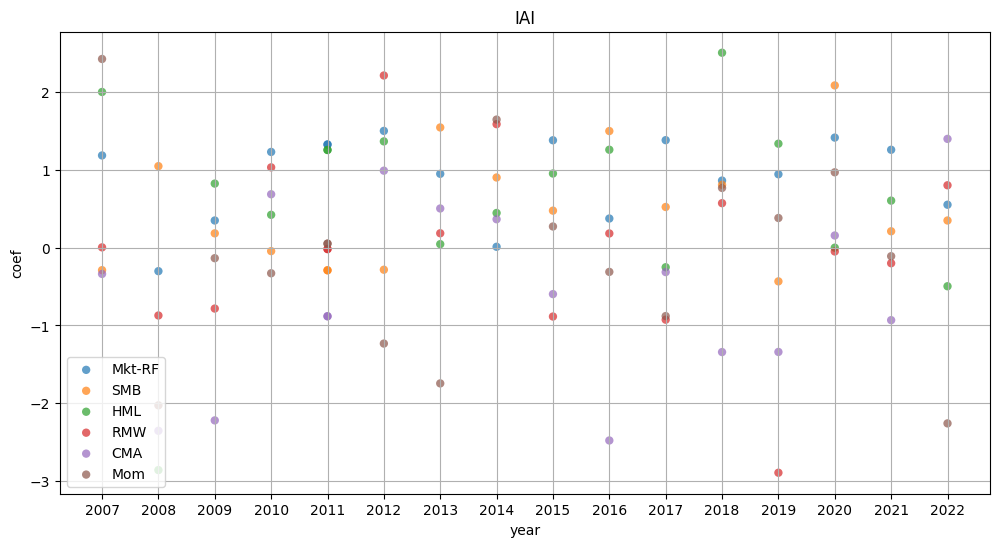

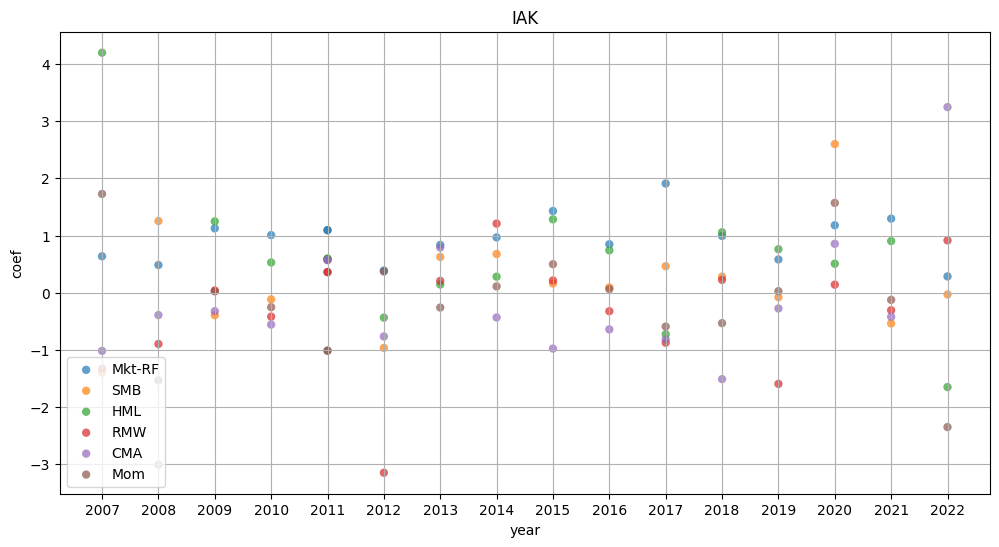

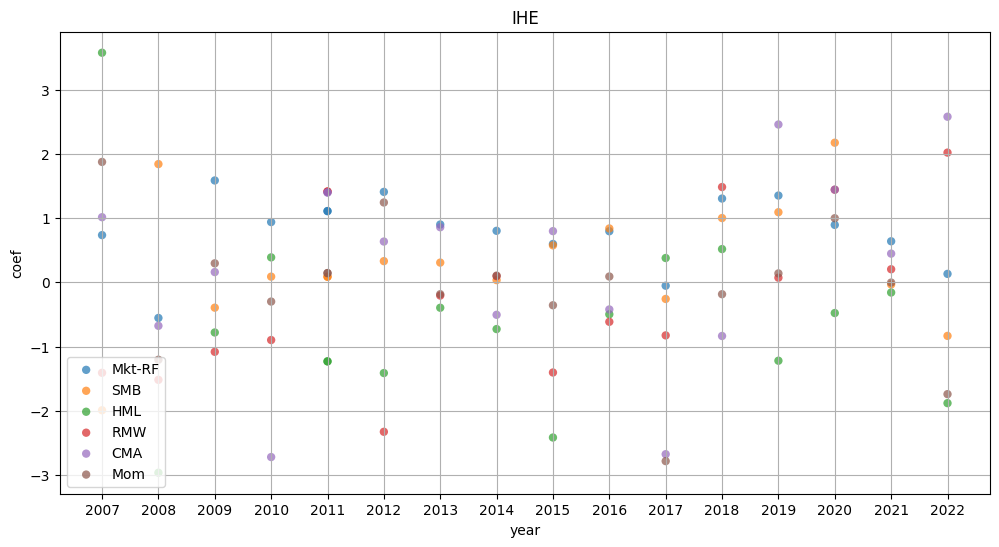

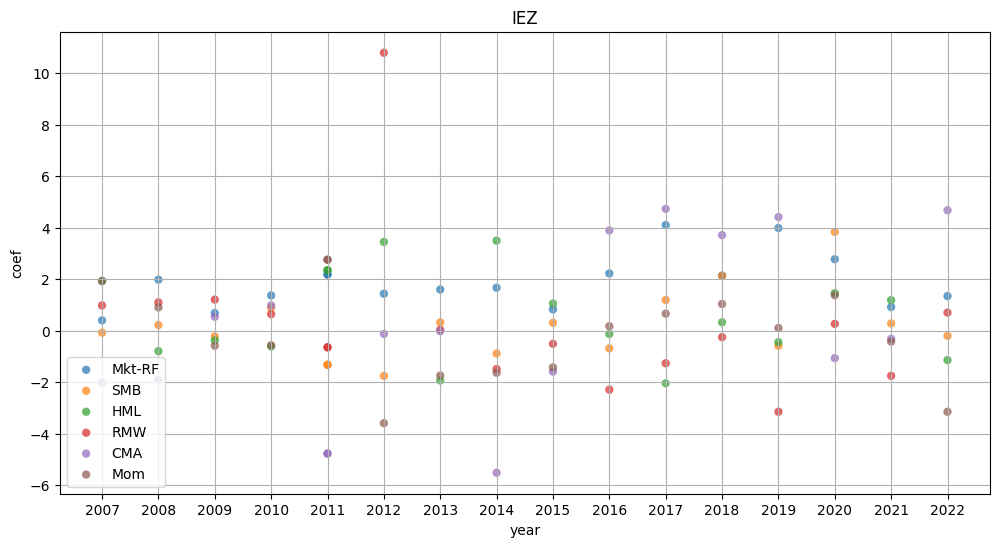

In [46]:
for ticker in rawdata.universe:
    plt.figure(figsize=(12, 6))

    for factor in factordata.factor_list:
        x = factordata.years
        y = 100 * ff6[[factor]].loc[ff6['ticker']== ticker]
        plt.scatter(x, y,label=factor,
                alpha=0.7, edgecolors='none')
        
    plt.xlabel('year')
    plt.ylabel('coef')

    plt.grid(True)
    plt.title(ticker)
    plt.legend(loc='lower left')
    plt.title(ticker)
    plt.savefig(os.path.join(rawdata.data_dir, ticker+'.png'))
    plt.show()
